In [36]:
import pandas as pd  # Импортируем библиотеку pandas


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('dz2.csv')

data_cleaned = data.drop(columns=[
    'Отметка времени',
    'С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)',
    'Вели конспект по занятиям? (лекции и/или практики)',
    'Выходили к доске на практике?',
    'Если работали/проходили стажировку, то какая ставка (загрузка):',
    'Есть кот дома? (в месте, где сейчас живете)',
    'Есть родной брат/сестра?',
    'Сколько в среднем играли в прошлом семестре? Укажите число в часах',
    'Оценка по физике в последнем семестре?',
    'Оценка по физике в школе'
])

# Заполнение пропусков
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])

# Преобразование числовых строк в float


data_cleaned.head()

,Итоговая оценка за экзамен по ТОЭ,"Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?",Оценка за ИДЗ по ТОЭ за семестр,Оценка по лабораторным ТОЭ,Оценка за последнюю контрольную работу по ТОЭ,В течении предыдущего семестра были трудоустроены и/или проходили стажировку?,Где проживаете?,Гражданство,Была ли стипендия в 3 семестре?,Оцените свое ментальное здоровье в прошлом семестре,"Оцените, насколько были истощены (уставши) к началу сессии"
0,5.0,75,5.0,5.0,5,нет,общежитие 8,KAZ,да,9,1
1,3.0,75,4.0,5.0,3,нет,дома,RUS,нет,7,6
2,3.0,75,5.0,5.0,5,да,дома,RUS,да,7,3
3,3.0,75,4.0,4.0,4,да,общежитие 8,KAZ,нет,7,2
4,4.0,100,4.0,5.0,5,нет,дома,RUS,нет,10,5


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Выделение признаков и целевого признака
X = data_cleaned.drop('Итоговая оценка за экзамен по ТОЭ', axis=1)
y = data_cleaned['Итоговая оценка за экзамен по ТОЭ']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование категориальных признаков (one-hot encoding)
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Создадим пайплайн для предобработки данных и обучения модели
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Используем RandomForest для регрессии
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

# Сохранение модели
joblib.dump(model, 'exam_score_prediction_model.joblib')

MSE: 0.6443285714285715, R²: -0.2143115384615384


['exam_score_prediction_model.joblib']

Корреляционная матрица:
                                                    Итоговая оценка за экзамен по ТОЭ  \
Итоговая оценка за экзамен по ТОЭ                                            1.000000   
Регулярность посещения занятий. Оцените процент...                           0.398725   
Оценка за ИДЗ по ТОЭ за семестр                                              0.515320   
Оценка по лабораторным ТОЭ                                                   0.422302   
Оценка за последнюю контрольную работу по ТОЭ                                0.274897   
Оцените свое ментальное здоровье в прошлом семе...                          -0.131314   
Оцените, насколько были истощены (уставши) к на...                           0.193855   

                                                    Регулярность посещения занятий. Оцените процент занятий, которые посетили в последнем семетре по ТОЭ (лекции+практика)?  \
Итоговая оценка за экзамен по ТОЭ                                                       

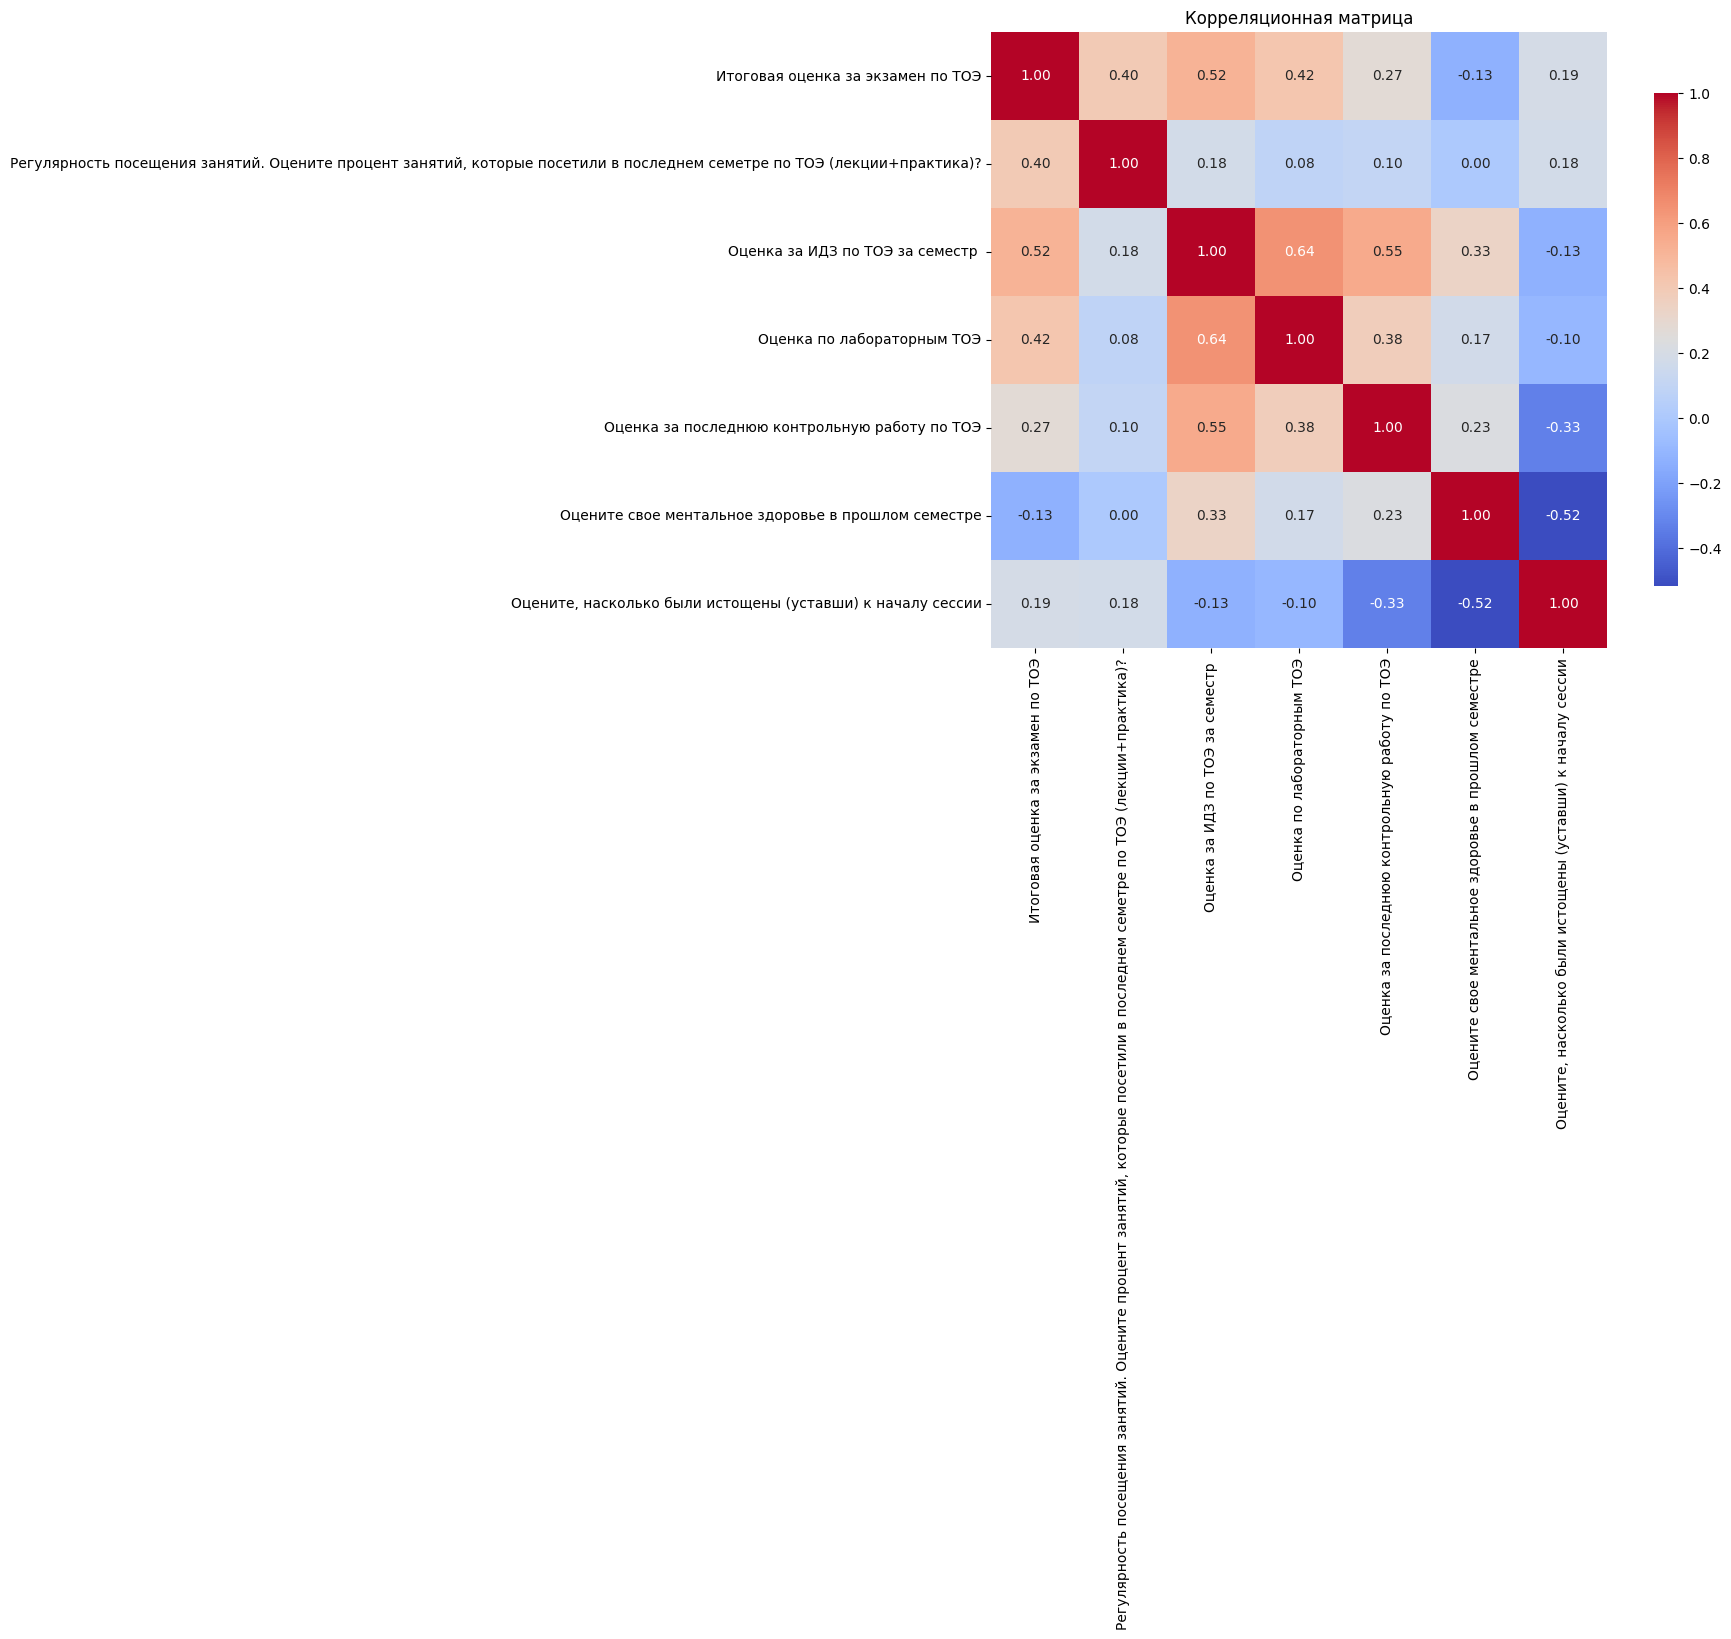

In [46]:
import seaborn as sns
# Корреляционная матрица только для числовых столбцов
correlation_matrix = data_cleaned[numeric_cols].corr()

# Выводим корреляционную матрицу в текстовом виде
print("Корреляционная матрица:")
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

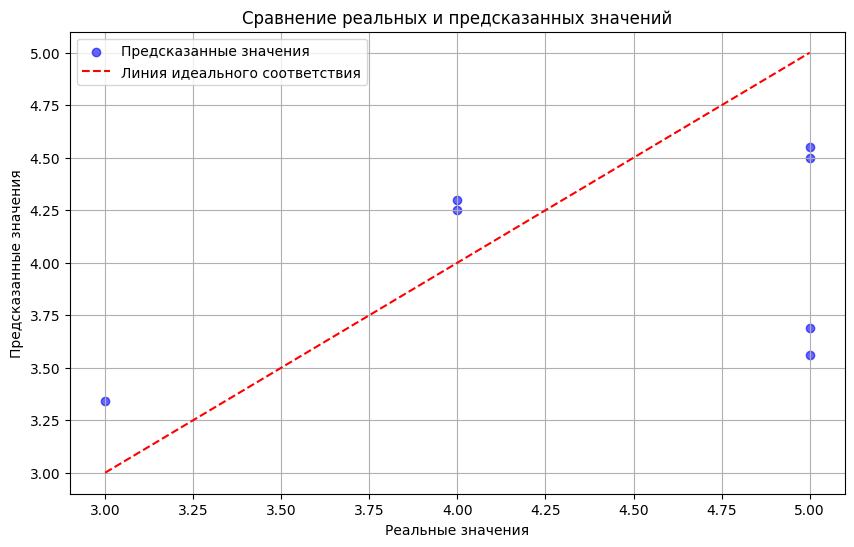

In [35]:
import matplotlib.pyplot as plt

# Создание графика
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Линия идеального соответствия')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()
plt.show()